### Unsupervised Learning
#### [Clustering](https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68)
Uses:
- Finding a pattern or structure in the data
- Feature selection

Types of clustering algorithms we will explore:
#### K-means clustering
The input are the data points and the output are the cluster centers.  The optimization goal is to minimize the average square distance between points and thier nearest representative K value.


$J = \sum_{n=1}^{N} \sum_{k=1}^{K} r_{nk} ||x_n - \mu_k||^2$
<br>
<br>Animation at [this](https://www.learndatasci.com/tutorials/k-means-clustering-algorithms-python-intro/) website to illustrate the process of the kmeans iterations until the local optimum is reached.  Depending on where the initial clusters are placed, a different local optimum can be reached.

#### Hiearchical Clustering
Don't need to set a number of clusters, which can be difficult if there is a multiscale structure.  Downside is this is a very slow model and would not be used for production level software.

Bottom up approach:
1. Each point is an individual cluster
2. Repeat the chosen linkage method until one cluster remains

Reverse for the top down approach.  Animation [here](https://www.youtube.com/watch?v=XJ3194AmH40).

Linkage methods:
- [Single](https://en.wikipedia.org/wiki/Single-linkage_clustering) (closest pair)
- Average
- [Complete](https://en.wikipedia.org/wiki/Complete-linkage_clustering) (aka farthest neighbour clustering)
- [Ward](https://en.wikipedia.org/wiki/Ward%27s_method) (the optimal value of an objective function, e.g. error of the sum of squares)





### Dataset - Animal attributes
Download the data from http://attributes.kyb.tuebingen.mpg.de.  Get the *base package.*  We will need the files Make *classes.txt* and *predicate-matrix-continuous.txt*  I learned of this dataset from the EdX course [UCSanDiegoX: DSE220x](https://www.edx.org/course/machine-learning-fundamentals-uc-san-diegox-dse220x) - Machine Learning Fundamentals.



In [59]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

The file *classes.txt* contains the names of the 50 animals. The file *predicate-matrix-continuous.txt* is a matrix of the 85 attributes per animal. Each attribute is a floating point number.  They were derived from animal images, and are combination of image/appearances related, behavioral and location features.  The list is in the *predicates.txt* file.

(50, 85)


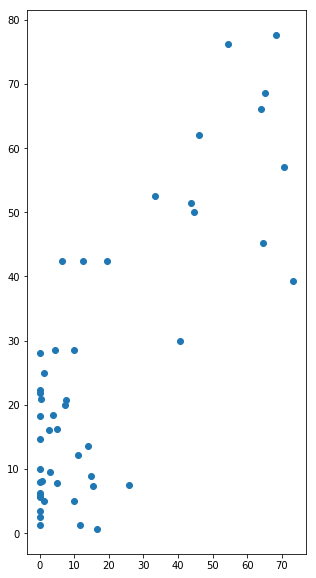

In [69]:
f = open('classes.txt')
f2= open('predicates.txt')
lines = f.readlines()
lines2 = f2.readlines()
#each line is this format an index number, a tab (whitespace) and animal name or feature name
names = []
features = []
for line in lines:
    (key,val) = line.split()
    names.append(val)
f.close()
for line in lines2:
    (key,val) = line.split()
    features.append(val)
f2.close()
#
# Load attribute matrix, the values of features for each animal

x = np.loadtxt('predicate-matrix-continuous.txt')
print(x.shape)
#choosing two of the features to show in 2 dimensions, 12:furry vs 13:hairless
plt.scatter(x[:,12], x[:,13])
plt.show()

### Choosing k for K-means
- Data exploration
- Domain knowledge of the data
- For an optimal solution
- - Elbow method and [silhouette_score](https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient) can be used to determine the k in which sum of the distances of points to thier assigned cluster is minimized.

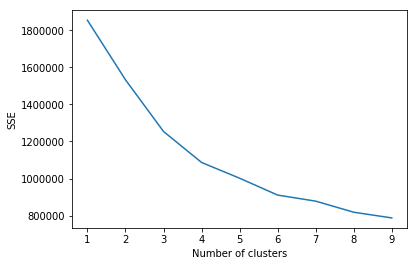

In [48]:
#print(features)
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, init='random').fit(x)
    #x["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

In [35]:

for n_cluster in range(2, 10):
    kmeans = KMeans(n_clusters=n_cluster).fit(x)
    label = kmeans.labels_
    sil_coeff = silhouette_score(x, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
   

For n_clusters=2, The Silhouette Coefficient is 0.16348787535203185
For n_clusters=3, The Silhouette Coefficient is 0.19831329730689093
For n_clusters=4, The Silhouette Coefficient is 0.1953044618701413
For n_clusters=5, The Silhouette Coefficient is 0.20560639982544063
For n_clusters=6, The Silhouette Coefficient is 0.17696745590142973
For n_clusters=7, The Silhouette Coefficient is 0.18029120569951324
For n_clusters=8, The Silhouette Coefficient is 0.16803865780193128
For n_clusters=9, The Silhouette Coefficient is 0.1732821378515062


In [33]:
k = 5 
kmeans = KMeans(n_clusters=k, init='random')
kmeans.fit(x)
clusters = []
for j in range(0,k):
    clusters.append([])
for i in range(0,50):
    clusters[kmeans.labels_[i]].append(names[i])
#
# Print out clusters
#
for j in range(0,k):
    print(j+1, clusters[j])

1 ['killer+whale', 'blue+whale', 'hippopotamus', 'humpback+whale', 'seal', 'otter', 'walrus', 'dolphin']
2 ['grizzly+bear', 'german+shepherd', 'tiger', 'leopard', 'fox', 'wolf', 'bobcat', 'lion', 'polar+bear']
3 ['antelope', 'horse', 'moose', 'elephant', 'ox', 'sheep', 'rhinoceros', 'giraffe', 'buffalo', 'zebra', 'deer', 'pig', 'cow']
4 ['beaver', 'dalmatian', 'persian+cat', 'siamese+cat', 'skunk', 'mole', 'hamster', 'rabbit', 'chihuahua', 'rat', 'weasel', 'giant+panda', 'mouse', 'collie', 'raccoon']
5 ['spider+monkey', 'gorilla', 'chimpanzee', 'squirrel', 'bat']


In [ ]:
Z = linkage(x, 'ward')

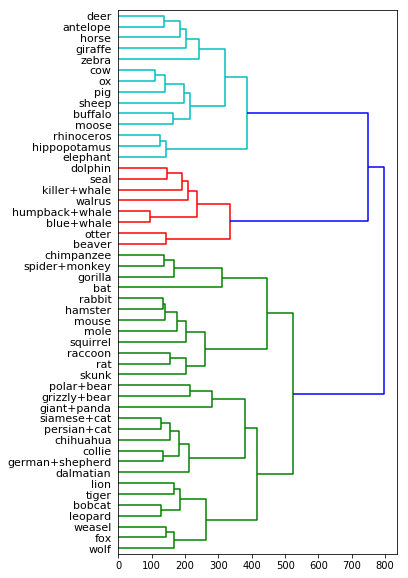

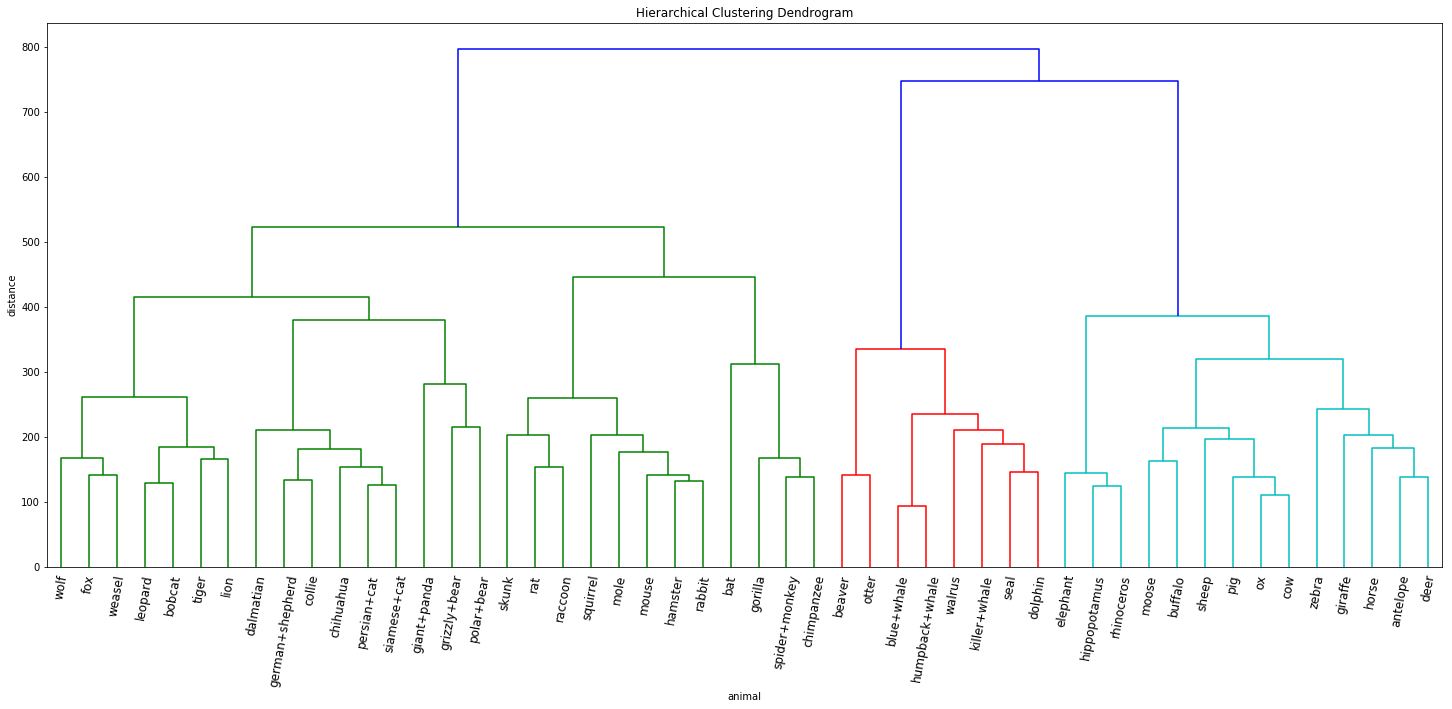

In [67]:
from pylab import rcParams
rcParams['figure.figsize'] = 5, 10

z = sch.linkage(x, method='ward')
#
# Display dendrogram
#
info = sch.dendrogram(z, orientation='right', labels=names, leaf_font_size=11)


plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('animal')
plt.ylabel('distance')
dendrogram(
    z,
    leaf_rotation=80.,  # rotates the x axis labels
    leaf_font_size=12.,  # font size for the x axis labels
    labels=names
)
plt.show()



#### Assignment
Try out some other linkage methods, such as *single*, *complete*, or *average* and other distance metrics such as *Euclidean*, *Manhattan* and *Maximum*.
